In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [2]:
datos = pd.read_excel("dataset-servicios.xlsx")

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33236 entries, 0 to 33235
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num_exp    33236 non-null  int64  
 1   cod_est    33236 non-null  object 
 2   cod_cli    26409 non-null  object 
 3   num_pol    33236 non-null  object 
 4   locali     26565 non-null  object 
 5   cod_com    33236 non-null  int64  
 6   nom_com    33236 non-null  object 
 7   cod_enc    33236 non-null  object 
 8   per_aut    1435 non-null   object 
 9   cti_pro_a  33232 non-null  float64
 10  tit_pol    33232 non-null  object 
 11  ben_ser    33231 non-null  object 
 12  lug_asi    33231 non-null  object 
 13  num_lin    33236 non-null  object 
 14  cod_pro    33236 non-null  int64  
 15  nom_pro    33236 non-null  object 
 16  mes        33236 non-null  object 
 17  fec_ser    33236 non-null  object 
 18  hor_ser    33236 non-null  object 
 19  cod_zon    32125 non-null  float64
 20  cod_pr

### ANALISIS EXPLORATORIO

In [4]:
datos

,num_exp,cod_est,cod_cli,num_pol,locali,cod_com,nom_com,cod_enc,per_aut,cti_pro_a,...,fechor,marca,color,año,placa,inciso,tel_cas,tel_ofi,cel_con,num
0,20000001,C,61,980755,ASISTO,2,"SEGUROS EL ROBLE, S.A.",BVB,NaN,1.0,...,01-Jan-10 00:19:36,BMW 320I,PLATEADO,2006.0,P-724BHS,1.0,NaN,NaN,55106421,1
1,20000004,C,1,3035,ASME,2,"SEGUROS EL ROBLE, S.A.",JSR,NaN,3.0,...,01-Jan-10 01:20:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57026077,4
2,20000007,C,61,41356,ASISTO,2,"SEGUROS EL ROBLE, S.A.",BVB,NaN,1.0,...,01-Jan-10 03:03:48,COROLLA,BEIGE,2003.0,P-988DBL,1.0,NaN,NaN,57032910,7
3,20000015,C,NaN,AUTORIZADO,NaN,2,"SEGUROS EL ROBLE, S.A.",DQG,NaN,3.0,...,01-Jan-10 07:52:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52073868,15
4,20000023,C,260,83,ASME,2,"SEGUROS EL ROBLE, S.A.",MEB,NaN,2.0,...,01-Jan-10 10:54:00,NaN,NaN,NaN,NaN,NaN,NaN,55505044.0,59185064,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33231,29009367,C,NaN,AUTORIZADO,NaN,2,"SEGUROS EL ROBLE, S.A.",AEG,NaN,5.0,...,04-Jan-10 12:45:27,TOYOTA HILUX,BEIGE,2009.0,108DTY,NaN,NaN,NaN,57606578,9367
33232,29009367,C,NaN,AUTORIZADO,NaN,2,"SEGUROS EL ROBLE, S.A.",AEG,NaN,5.0,...,04-Jan-10 12:46:32,TOYOTA HILUX,BEIGE,2009.0,108DTY,NaN,NaN,NaN,57606578,9367
33233,29009514,C,NaN,AUTORIZADO,NaN,2,"SEGUROS EL ROBLE, S.A.",AVT,NaN,4.0,...,19-Jan-10 12:26:30,AGUA PURA SALVAVIDAS,NaN,NaN,N1574,NaN,NaN,41012322.0,50458175,9514
33234,29009514,C,NaN,AUTORIZADO,NaN,2,"SEGUROS EL ROBLE, S.A.",AVT,NaN,4.0,...,19-Jan-10 12:35:25,AGUA PURA SALVAVIDAS,NaN,NaN,N1574,NaN,NaN,41012322.0,50458175,9514


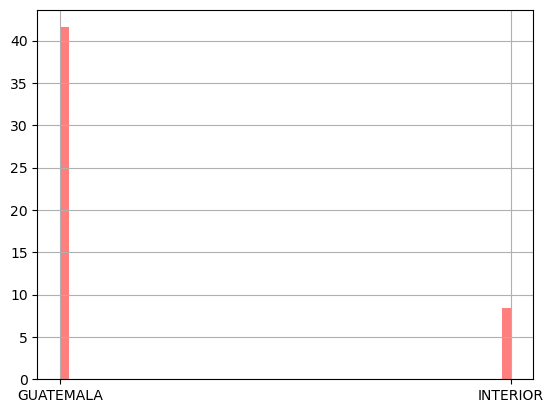

In [14]:
datos['nom_dep'].hist(bins=50, density=True, color='red', alpha=0.5)
plt.show()

### Variable "estimado"

In [6]:
media = datos['estimado'].mean()
mediana = datos['estimado'].median()

print(f"Media: {media}")
print(f"Median: {mediana}")

Media: 121.54723823564807
Median: 45.0


In [7]:
datos['estimado_mean']= np.round(datos['estimado'].fillna(media),0)
datos['estimado_median']= np.round(datos['estimado'].fillna(mediana),0)

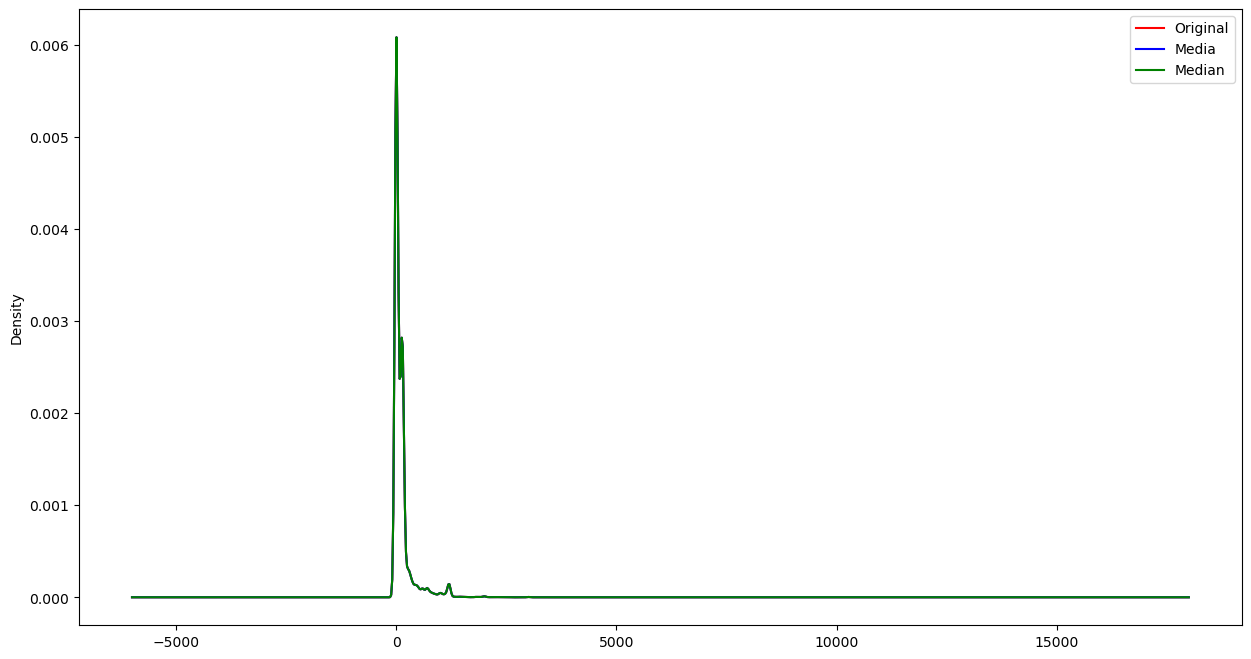

In [8]:
fig = plt.figure()
ax=fig.add_subplot(111)

datos['estimado'].plot.density(color='red', label='Original', figsize=(15, 8))
datos['estimado_mean'].plot.density(color='blue', label='Media', figsize=(15, 8))
datos['estimado_median'].plot.density(color='green', label='Median', figsize=(15, 8))
ax.legend()

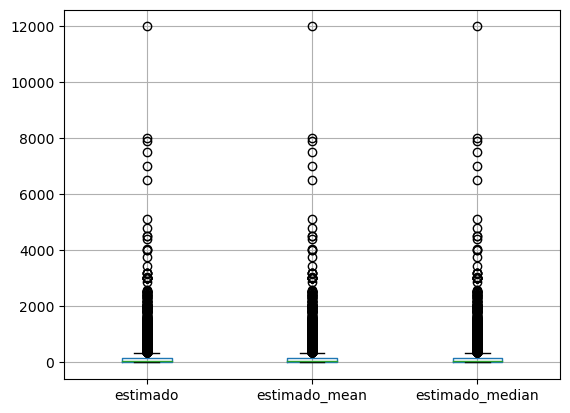

In [9]:
datos[['estimado', 'estimado_mean', 'estimado_median']].boxplot()
plt.show()

### Variable Departamento

<BarContainer object of 33236 artists>

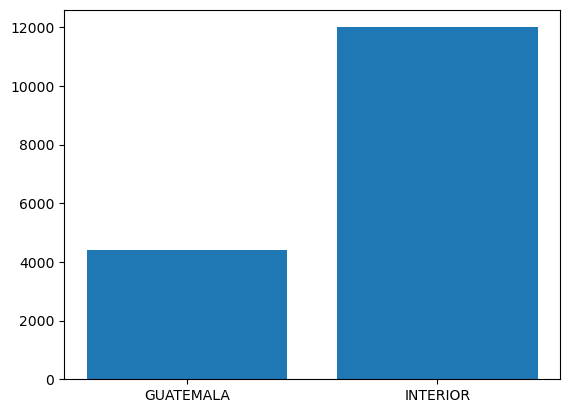

In [10]:

fig, ax = plt.subplots()
ax.bar(x = datos['nom_dep'], height = datos['estimado'])
